In [1]:
%matplotlib inline
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, auc
import warnings
warnings.filterwarnings('ignore')

### Helper functions

In [8]:
def plot_roc(fpr, tpr, roc_auc, color='darkorange', label=''):
    plt.plot(fpr, tpr, color=color,
             lw=2, label=label + 'ROC curve (area = %0.2f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate', fontsize='x-large')
    plt.ylabel('True Positive Rate', fontsize='x-large')
    plt.legend(loc="lower right")
    plt.tight_layout()

### Read data file

In [3]:
df_dict = {}
for i in range(9):
    df_dict[i] = pd.read_csv('./data/data_readers_{}.csv'.format(i))

### Deep learning

In [4]:
df_dl = pd.read_csv('./data/predictions_test.csv')
y_pred_dl_test = df_dl['Prediction'].as_matrix()
y_true_dl_test = df_dl['Cancer'].as_matrix()

### Prediction based on TI-RADS

In [5]:
fpr_dl, tpr_dl, _ = roc_curve(y_true_dl_test, y_pred_dl_test)
roc_auc_dl = roc_auc_score(y_true_dl_test, y_pred_dl_test)

fpr = {}
tpr = {}
roc_auc = {}
for i in range(9):
    fpr_reader, tpr_reader, _ = roc_curve(df_dict[i]['Cancer'].as_matrix(), df_dict[i]['TIRADS points'].as_matrix())
    roc_auc_reader = roc_auc_score(df_dict[i]['Cancer'].as_matrix(), df_dict[i]['TIRADS points'].as_matrix())
    fpr[i] = fpr_reader
    tpr[i] = tpr_reader
    roc_auc[i] = roc_auc_reader

### Results analysis

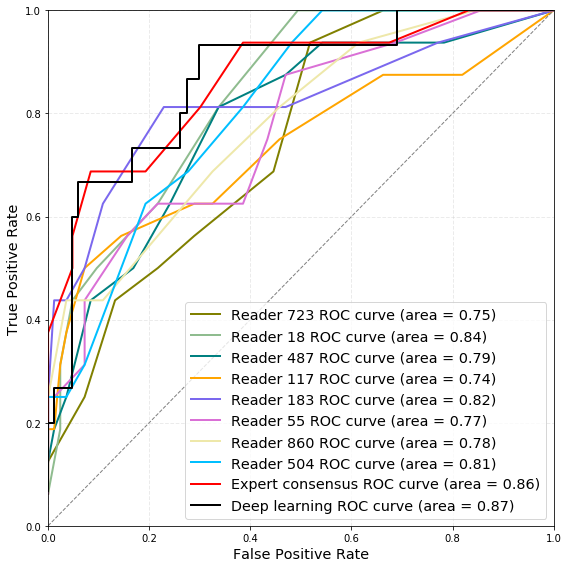

In [9]:
plt.figure(figsize=(8, 8))
colors = ['olive', 'darkseagreen', 'teal', 'orange', 'mediumslateblue', 'orchid', 'palegoldenrod', 'deepskyblue', 'red']
for i in range(9):
    user_id = df_dict[i]['User ID'].as_matrix()[0]
    label = 'Reader {} '.format(user_id)
    if user_id == 0: label = 'Expert consensus '
    plot_roc(fpr[i], tpr[i], roc_auc[i], color=colors[i], label=label)
plot_roc(fpr_dl, tpr_dl, roc_auc_dl, color='black', label='Deep learning ')
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.title('', fontsize='xx-large')
plt.legend(loc='lower right', fontsize='x-large')
plt.grid(color='silver', alpha=0.3, linestyle='--', linewidth=1)